In [672]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

In [657]:
def CreatePoints1D(n_samples,std):
    X = np.arange(1,n_samples,1)
    ones=np.ones([X.shape[0],2])
    ones[:,0]=X
    Y = (np.random.rand() * X) + np.random.rand()
    Y = Y + np.random.normal(0, std, len(X))
    return ones,Y
X,Y=CreatePoints1D(100,7.5)

In [658]:
def CreatePointsMD(n_variables,n_samples,std):
    X = np.random.rand(n_samples, n_variables)
    X_ = np.ones([n_samples, n_variables+1])
    X_[:, :n_variables] = X
    beta = np.random.rand(1,n_variables+1)*20
    Y = beta@X_.T + np.random.normal(0, std, size = [1, n_samples])
    return (X_,Y.T)

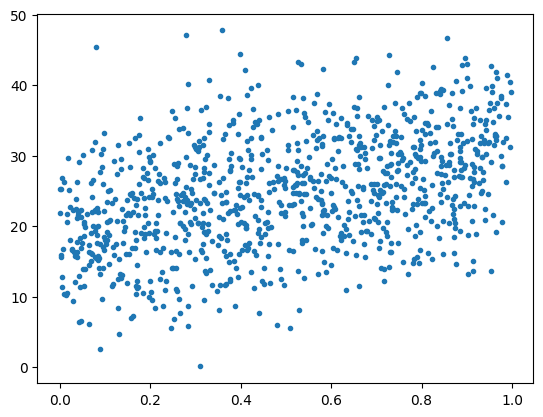

In [659]:
X,Y=CreatePointsMD(2,1000,7.5)
plt.plot(X[:,0],Y,'.')

In [660]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [749]:
def ShowTendency(X,Y,Y_pred):
    plt.scatter(X,Y)
    plt.plot(X,Y_pred,'-',c='r')
    plt.show()

In [745]:
def LinearRegression1D(X,Y):
    y_mean=Y.mean()
    x_mean=X.mean(axis=0)
    alpha=np.ones(2)
    a=np.sum((Y-y_mean)*X)/np.sum((X-x_mean)*X)
    alpha[0]=a
    b=(np.sum(Y-(X*alpha[0])))/(X.shape[0]+1)
    alpha[-1]=b
    return alpha
a=LinearRegression1D(X,Y)  

In [663]:
def LinearRegressionMD(X,Y):
    M1=np.linalg.inv(np.transpose(X)@X)
    M2=np.transpose(X)@Y
    beta=M1@M2
    return beta

In [664]:
Beta=LinearRegressionMD(x_train,y_train)
print(Beta)

[[11.81255939]
 [-0.08376781]
 [18.92649913]]


In [665]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)
pendientes_sklearn = model.coef_
intercepto_sklearn = model.intercept_

In [666]:
print(pendientes_sklearn)
print(intercepto_sklearn)

[[11.81255939 -0.08376781  0.        ]]
[18.92649913]


In [667]:
y_pred=model.predict(x_test)

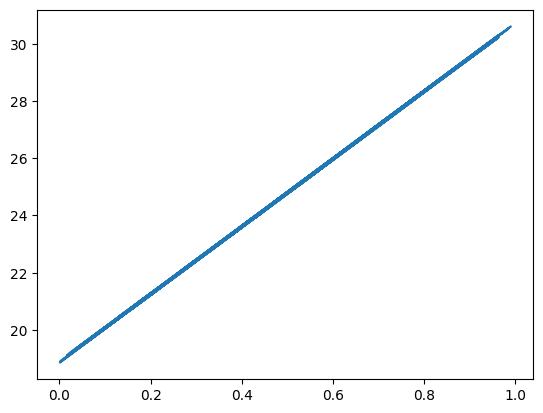

In [668]:
plt.plot(x_test[:,0],y_pred)

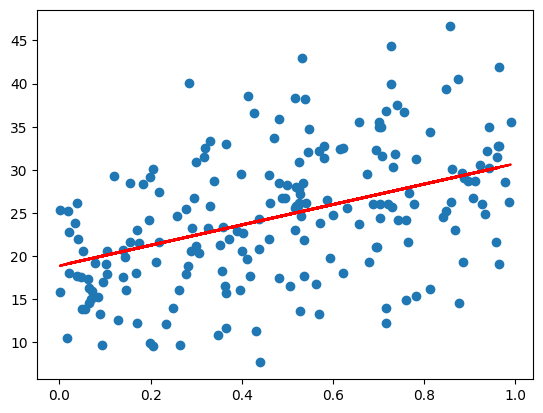

In [669]:
ShowTendency(x_test,y_test,Beta)

In [709]:
W_df = pd.read_csv('Walmart_Sales.csv')
W_df=W_df.drop(columns=['Store','Date','Unemployment','Holiday_Flag'])
W_df=W_df.drop_duplicates(keep='first')

In [710]:
W_df=W_df.to_numpy()
print(W_df)

[[1.64369090e+06 4.23100000e+01 2.57200000e+00 2.11096358e+02]
 [1.64195744e+06 3.85100000e+01 2.54800000e+00 2.11242170e+02]
 [1.61196817e+06 3.99300000e+01 2.51400000e+00 2.11289143e+02]
 ...
 [7.34464360e+05 5.44700000e+01 4.00000000e+00 1.92327265e+02]
 [7.18125530e+05 5.64700000e+01 3.96900000e+00 1.92330854e+02]
 [7.60281430e+05 5.88500000e+01 3.88200000e+00 1.92308899e+02]]


In [722]:
print(W_df[])

[1643690.9  1641957.44 1611968.17 ...  734464.36  718125.53  760281.43]


In [687]:
RS_df = pd.read_csv('Real estate.csv')
RS_df=RS_df.drop(columns=['No','X1 transaction date','X5 latitude','X6 longitude'])
RS_df=RS_df.drop_duplicates(keep='first')

In [692]:
RS_df=RS_df.to_numpy()
print(RS_df)

[[ 32.       84.87882  10.       37.9    ]
 [ 19.5     306.5947    9.       42.2    ]
 [ 13.3     561.9845    5.       47.3    ]
 ...
 [ 18.8     390.9696    7.       40.6    ]
 [  8.1     104.8101    5.       52.5    ]
 [  6.5      90.45606   9.       63.9    ]]


In [746]:
Beta1=LinearRegression1D(W_df[:,1],W_df[:,0])

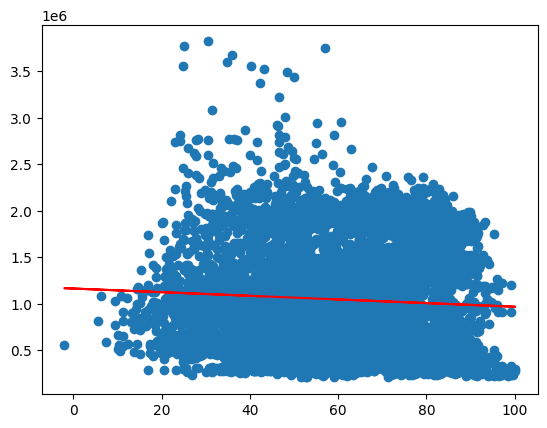

In [750]:
Y_pred=(W_df[:,1]*Beta1[0])+Beta1[1]
ShowTendency(W_df[:,1],W_df[:,0],Y_pred)